In [1]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


In [2]:
print(data)

[[-1.2879095  -0.12001342 -1.45900038 -0.66660821 -0.14421743  1.85884913]
 [-0.59338101  0.36716642 -0.30309415 -0.98732948 -0.74026221  1.81901037]
 [-0.59338101 -0.26581176 -0.30309415 -0.98732948 -0.74026221  1.81989281]
 ...
 [ 0.11573841  0.79744934  1.17646583 -0.80321172  0.15812412  1.59974823]
 [ 0.11573841  0.73699637  1.17646583 -0.80321172  0.15812412  1.5997457 ]
 [ 0.11573841  0.43473151  1.17646583 -0.80321172  0.15812412  1.59957717]]


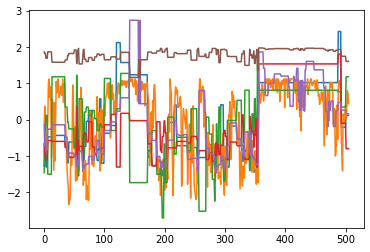

In [3]:
import matplotlib.pyplot as plt

plt.plot(data)

(array([[  0.,   0.,  78., 132.,  84.,  20., 135.,  45.,   7.,   5.],
        [  7.,  39.,  58.,  55.,  56.,  77., 171.,  43.,   0.,   0.],
        [ 16.,  42.,  32.,  36.,  88.,  83., 153.,  56.,   0.,   0.],
        [  0.,   0.,  45., 195.,  98.,  31.,   0., 132.,   5.,   0.],
        [  0.,   0.,  62., 126., 109.,  70.,  53.,  62.,   8.,  16.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  96., 410.,   0.]]),
 array([-2.70737911, -2.16340655, -1.61943399, -1.07546143, -0.53148888,
         0.01248368,  0.55645624,  1.1004288 ,  1.64440136,  2.18837392,
         2.73234648]),
 <a list of 6 BarContainer objects>)

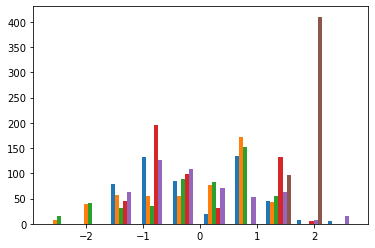

In [5]:
plt.hist(data)

In [6]:
y

array([1.85884913, 1.81901037, 1.81989281, 1.68590132, 1.68590132,
       1.68590132, 1.86287361, 1.86280288, 1.86297618, 1.86199198,
       1.8626778 , 1.86187964, 1.86305071, 1.5772558 , 1.57622987,
       1.57730239, 1.57730507, 1.5761327 , 1.57730507, 1.57685646,
       1.57720603, 1.57658936, 1.57681093, 1.57725697, 1.57699855,
       1.57630393, 1.57668805, 1.57655372, 1.57701904, 1.57642504,
       1.57699855, 1.57725697, 1.57613743, 1.57705772, 1.57715887,
       1.64073556, 1.64075026, 1.64075034, 1.64075034, 1.75865308,
       1.75865308, 1.81735757, 1.81735757, 1.81735757, 1.81735757,
       1.81735757, 1.81735757, 1.81618106, 1.81673636, 1.81735389,
       1.91470075, 1.91470064, 1.91470075, 1.91470075, 1.54097898,
       1.83311419, 1.8726413 , 1.9587138 , 1.53007234, 1.53007234,
       1.53007203, 1.52889467, 1.53007112, 1.53007234, 1.69928217,
       1.92920374, 1.92920374, 1.66072672, 1.66072672, 1.66072672,
       1.5938822 , 1.5938822 , 1.5938822 , 1.5938822 , 1.70650

In [7]:
len(X)

506

# Forward Propagation

In [4]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation 
    return 1/(1+np.exp(-z))

def forward_propagation(x, y, w):
    '''In this function, we will compute the forward propagation '''
    # X: input data point, note that in this assignment you are having 5-d data points 
    # y: output varible 
    # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph. 
    # you have to return the following variables 
    # exp= part1 (compute the forward propagation until exp and then store the values in exp) 
    # tanh =part2(compute the forward propagation until tanh and then store the values in tanh) 
    # sig = part3(compute the forward propagation until sigmoid and then store the values in sig) 
    # now compute remaining values from computional graph and get y' 
    # write code to compute the value of L=(y-y')^2 
    # compute derivative of L  w.r.to Y' and store it in dl 
    # Create a dictionary to store all the intermediate values # store L, exp,tanh,sig variables 
    
    #part1 
    s1=w[0]*x[0] 
    s2=w[1]*x[1] 
    s3=s1+s2 
    s4=s3*s3 
    s5=s4+w[5] 
    exp=np.exp(s5) 
    
    #part2 
    s7=exp+w[6] 
    tanh=np.tanh(s7)
    
    #part3 
    s9=w[2]*x[2] 
    s10=np.sin(s9)
    
    
    s11=w[3]*x[3] 
    s12=w[4]*x[4] 
    s13=s11+s12 
    s14=s10*s13 
    s15=s14+w[7] 
    sig=sigmoid(s15) 
    
    s17=sig*w[8] 
    
    y_pred=s17+tanh 
    
    L=np.square(y-y_pred) 
    
    dl=-2*(y-y_pred) 
    
    dictionary={'exp':exp,
                'sigmoid':sig,
                'tanh':tanh,
                'loss':L,
                'dy_pr':dl,
                'sin':s10,
                'cos':np.cos(s9)
               } 
    
    return dictionary

# Backward propagation

In [12]:
def backward_propagation(L,W,dic):
    '''In this function, we will compute the backward propagation '''
    # L: the loss we calculated for the current point
    # dictionary: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    dw1=dic['dy_pr']*(1-np.square(dic['tanh']))*dic['exp']*2*((W[0]*L[0]+W[1]*L[1])*L[0])
    
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    dw2=dic['dy_pr']*(1-np.square(dic['tanh']))*dic['exp']*2*((W[1]*L[1]+W[0]*L[0])*L[1]) 
    
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    dw3=dic['dy_pr']*W[8]*dic['sigmoid']*(1-dic['sigmoid'])*(W[3]*L[3]+L[4]*W[4])*dic['cos']*L[2] 
    
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    dw4=dic['dy_pr']*W[8]*dic['sigmoid']*(1-dic['sigmoid'])*dic['sin']*L[3]
    
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    dw5=dic['dy_pr']*W[8]*dic['sigmoid']*(1-dic['sigmoid'])*dic['sin']*L[4]
    
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    dw6=dic['dy_pr']*(1-np.square(dic['tanh']))*dic['exp'] 
    
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    dw7=dic['dy_pr']*(1-np.square(dic['tanh']))   
    
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    dw8=dic['dy_pr']*W[8]*dic['sigmoid']*(1-dic['sigmoid'])
    
    # dw9 = # in dw9 compute derivative of L w.r.to w9
    dw9=dic['dy_pr']*dic['sigmoid']
    
    dW={
        'dw1':dw1,
        'dw2':dw2,
        'dw3':dw3,
        'dw4':dw4,
        'dw5':dw5,
        'dw6':dw6,
        'dw7':dw7,
        'dw8':dw8,
        'dw9':dw9
    }

    return dW

# Implement gradient checking

In [13]:
W = np.random.rand(9)
eps=0.0001
def gradient_checking(data_point, W):
    '''This function is used to check the gradients using gradient approximation method'''
    # compute the L value using forward_propagation()
    dic=forward_propagation(data_point, y[0], W)
    # compute the gradients of W using backword_propagation()
    dw=backward_propagation(data_point, W, dic)
    dw=list(dw.values())
    
    approx_gradients = []                 #to store all the gradients approximatios
    
    for i in range(len(W)):
        # add a small value to weight wi, and then find the values of L with the updated weights
        w_eps_plus=W.copy()
        w_eps_plus[i]+=eps
        loss_plus=forward_propagation(data_point, y[0], w_eps_plus)
        dw_plus=backward_propagation(data_point, w_eps_plus, loss_plus)
        loss_plus=loss_plus['loss']
        
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        w_eps_minus=W.copy()
        w_eps_minus[i]-=eps
        loss_minus=forward_propagation(data_point, y[0], w_eps_minus)
        dw_minus=backward_propagation(data_point, w_eps_minus, loss_minus)
        loss_minus=loss_minus['loss']
        
        # compute the approximation gradients of weight wi
        dw_approximation=(loss_plus - loss_minus)/(2*eps)
        approx_gradients.append(dw_approximation)
    
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with gradient_check formula
    gradient_check=[]
    
    for i in range(len(W)):                                                          #for each weight
        numarator = np.linalg.norm(dw[i] - approx_gradients[i] )                     #apply the standard approximation formula
        denominator = np.linalg.norm(dw[i]) + np.linalg.norm(approx_gradients[i])
        diff = numarator / denominator
        gradient_check.append(diff)
    
    return gradient_check
dw_check=gradient_checking(X[0], W)

In [15]:
#Venilla update is a simple form of SGD

w=list(np.random.normal(0.0, 0.01, 9))               #normal weights

# Vanilla Update Weight (SGD)

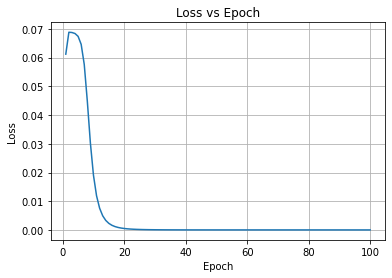

In [16]:
vanilla_weight=w         #weights
lr=0.01                  #learning rate
Loss=[]                  #to store total loss

for epoch in range(100):         #for each epoch
    for i, j in zip(X, y):                    #for each data points 
        dictionary=forward_propagation(i, j, vanilla_weight)   #to get dictionory of loss, y_predicted, exp, sigmoid, sin ,cos
        loss=dictionary['loss']                                #to get loss from dictionory 
        dw=backward_propagation(i, vanilla_weight, dictionary) #backpropagate by passing dictionory 
        dw=list(dw.values())                                   #to get grads
        dw=[i * lr for i in dw]                                #apply simple sgd 
        vanilla_weight=np.subtract(vanilla_weight, dw)        
    Loss.append(loss)
    
#import required libraries

import matplotlib.pyplot as plt

epoch=list(range(1, 101))             #for epoch of 101 values
plt.plot(epoch, Loss)
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Momentum Update Weight

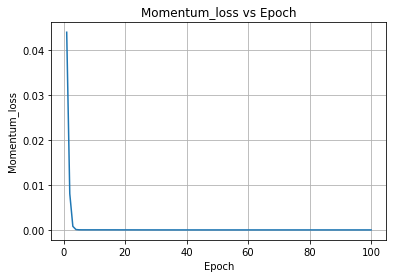

In [17]:
momentum_weight=w             #random normal weights
v=list(np.zeros(9))           #velocity's
learning_rate=0.01            #learining rate
momentum=0.9                  #gama or momentum
momentum_loss=[]              #to store total loss

for epoch in range(100):                                    #for each epoch
    for i, j in zip(X, y):                                       #for each data points
        dictionary=forward_propagation(i, j, momentum_weight)
        loss=dictionary['loss']
        dw=backward_propagation(i, momentum_weight, dictionary)
        dw=list(dw.values())
        for i in range(len(dw)):                                     #applt standard momentum formula 
            v[i]=(momentum*v[i])+(lr*dw[i])
        momentum_weight=[i-j for i, j in zip(momentum_weight, v)]
    momentum_loss.append(loss)

import matplotlib.pyplot as plt

epoch=list(range(1, 101))
plt.plot(epoch, momentum_loss)
plt.title("Momentum_loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Momentum_loss")
plt.grid()
plt.show()

# Adam Update Weight

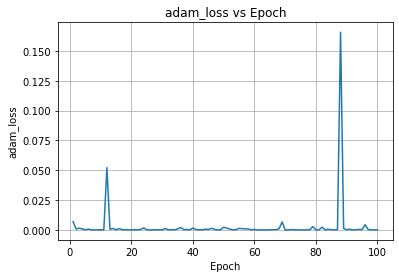

In [18]:
adam_weight=w                #random normal weights initalization
m=list(np.zeros(9))          
v=list(np.zeros(9))
alpha = 0.1                  #alpha 
beeta1=0.9                   #beeta1 for m
beeta2=0.999                 #beeta2 for v
eps = 1e-8                   #some small noise
adam_loss=[]                 #to store loss

for epoch in range(100):
    for i, j in zip(X, y):
        dictionary=forward_propagation(i, j, adam_weight)
        loss=dictionary['loss']
        dw=backward_propagation(i, adam_weight, dictionary)
        dw=list(dw.values())
        for i in range(len(dw)):                                     #apply standard adam optimization formula
            m[i]=(beeta1*m[i])+((1-beeta1)*dw[i])
            v[i]=(beeta2*v[i])+((1-beeta2)*(dw[i]**2))
            adam_weight[i]+=-alpha*m[i]/(np.sqrt(v[i])+eps)
    adam_loss.append(loss)
    
import matplotlib.pyplot as plt
epoch=list(range(1, 101))
plt.plot(epoch, adam_loss)
plt.title("adam_loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("adam_loss")
plt.grid()
plt.show()